In [247]:
# download unstructured data from source - kaggle 
# This is link to download txt file containing hospital data
url = "https://www.kaggle.com/datasets/rahulelhan21/patient-data?select=unstructured_patient_data.txt"
# save unstructured_patient_data.txt in workspace, to convert to structured data

In [248]:
import pandas as pd
import re

file_path = "C:/Users/lenovo/Desktop/Dic_Project/Data_Files/unstructured_patient_data.txt"
# Read the file and extract the data lines
with open(file_path, 'r') as file:
    raw_data = file.readlines()

# Create an empty list to store structured patient data
patients_data = []

# Loop through each line of the file to extract patient information
for line in raw_data:
    # Use regular expressions to extract relevant data fields
    patient_id = re.search(r'Patient (\w+)', line).group(1)
    age = int(re.search(r'(\d+)-year-old', line).group(1))
    gender = "Male" if "Male" in line else "Female"
    cholesterol = int(re.search(r'cholesterol level of (\d+) mg/dL', line).group(1))
    blood_pressure = re.search(r'blood pressure of (\d+/\d+)', line).group(1)
    heart_rate = int(re.search(r'heart rate of (\d+) beats per minute', line).group(1))
    diabetes = "Yes" if "has diabetes" in line else "No"
    family_history = "Yes" if "family history of heart disease" in line else "No"
    smoker = "Yes" if "smoker" in line else "No"
    bmi = float(re.search(r'BMI of (\d+.\d+)', line).group(1))
    physical_activity = int(re.search(r'engage in (\d+) days of physical activity', line).group(1))
    sedentary_time = float(re.search(r'spend (\d+.\d+) hours sedentary', line).group(1))
    sleep_duration = int(re.search(r'sleep for (\d+) hours per night', line).group(1))
    country = re.search(r'lives in (\w+(?: \w+)*)', line).group(1)
    hemisphere = "Northern" if "Northern Hemisphere" in line else "Southern"
    continent = re.search(r'located in (\w+)', line).group(1)
    heart_attack_risk = "High" if "risk of heart attack is assessed as high" in line else "Low"

    # Append the extracted data to the list as a dictionary
    patients_data.append({
        "Patient ID": patient_id,
        "Age": age,
        "Gender": gender,
        "Cholesterol": cholesterol,
        "Blood Pressure": blood_pressure,
        "Heart Rate": heart_rate,
        "Diabetes": diabetes,
        "Family History of Heart Disease": family_history,
        "Smoking": smoker,
        "BMI": bmi,
        "Days of Physical Activity per Week": physical_activity,
        "Sedentary Time per Day (hours)": sedentary_time,
        "Sleep Duration (hours)": sleep_duration,
        "Country": country,
        "Continent": continent,
        "Hemisphere": hemisphere,
        "Risk of Heart Attack": heart_attack_risk
    })

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(patients_data)

# Display the first few rows of the DataFrame to verify the structured data
df.head()

# Save the DataFrame to a CSV file (optional)
df.to_csv('C:/Users/lenovo/Desktop/Dic_Project/structured_patient_data.csv', index=False)


In [249]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/structured_patient_data.csv')

# 1. Handle Missing Data
# Impute missing values in 'Cholesterol' and 'Heart Rate' with their mean values
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)
df['Heart Rate'].fillna(df['Heart Rate'].mean(), inplace=True)

# 2. Remove Duplicate Rows
df.drop_duplicates(inplace=True)


# 3. Handle Outliers (using Z-score for 'BMI')
z_scores = np.abs(stats.zscore(df['BMI']))
df = df[(z_scores < 3)]  # Keeping rows where Z-score is below 3

# 4. Convert Data Types
# Ensure 'Age' is an integer and 'Cholesterol' and 'Heart Rate' are numeric
df['Age'] = df['Age'].astype(int)
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'])
df['Heart Rate'] = pd.to_numeric(df['Heart Rate'])

# 5. Normalize Data (scaling 'Cholesterol' to a 0-1 range)
df['Cholesterol Normalized'] = (df['Cholesterol'] - df['Cholesterol'].min()) / (df['Cholesterol'].max() - df['Cholesterol'].min())

# 6. Standardize Text Fields
# Ensure 'Country' and 'Continent' are properly formatted
df['Country'] = df['Country'].str.title()
df['Continent'] = df['Continent'].str.title()

# 7. Handle Structural Errors
# Example: Remove special characters and standardize text in 'Hemisphere'
df['Hemisphere'] = df['Hemisphere'].str.replace('Hemisphere', '').str.strip()

# 8. Binning (Feature Engineering)
# Bin 'Age' into categories: 'Young', 'Middle-aged', 'Senior'
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])

# 9. Detect and Handle Data Inconsistencies
# Standardize 'Smoking' column (if it's inconsistent in some cases)
df['Smoking'] = df['Smoking'].replace({'Yes': 1, 'No': 0})  # Ensure binary representation (1 = Smoker, 0 = Non-smoker)

# 10. Standardize Data Formats
# Split the 'Blood Pressure' column into two columns: 'Systolic' and 'Diastolic'
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert 'Systolic BP' and 'Diastolic BP' into numeric values
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])

# Display cleaned data
print("\nCleaned Data:")
print(df.head())

# Save cleaned data to a new CSV file
df.to_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv', index=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19908\649104056.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19908\649104056.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a


Cleaned Data:
  Patient ID  Age  Gender  Cholesterol Blood Pressure  Heart Rate Diabetes  \
0    BMW7812   67    Male          208         158/88          72       No   
1    CZE1114   21    Male          389         165/93          98      Yes   
2    BNI9906   21  Female          324         174/99          72      Yes   
3    JLN3497   84    Male          383        163/100          73      Yes   
4    GFO8847   66    Male          318          91/88          93      Yes   

  Family History of Heart Disease  Smoking    BMI  ...  \
0                             Yes        1  31.25  ...   
1                             Yes        1  27.19  ...   
2                             Yes        1  28.18  ...   
3                             Yes        1  36.46  ...   
4                             Yes        1  21.81  ...   

   Sedentary Time per Day (hours)  Sleep Duration (hours)    Country  \
0                            6.62                       6  Argentina   
1                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient ID                          8763 non-null   object 
 1   Age                                 8763 non-null   int64  
 2   Gender                              8763 non-null   object 
 3   Cholesterol                         8763 non-null   int64  
 4   Blood Pressure                      8763 non-null   object 
 5   Heart Rate                          8763 non-null   int64  
 6   Diabetes                            8763 non-null   object 
 7   Family History of Heart Disease     8763 non-null   object 
 8   Smoking                             8763 non-null   int64  
 9   BMI                                 8763 non-null   float64
 10  Days of Physical Activity per Week  8763 non-null   int64  
 11  Sedentary Time per Day (hours)      8763 no

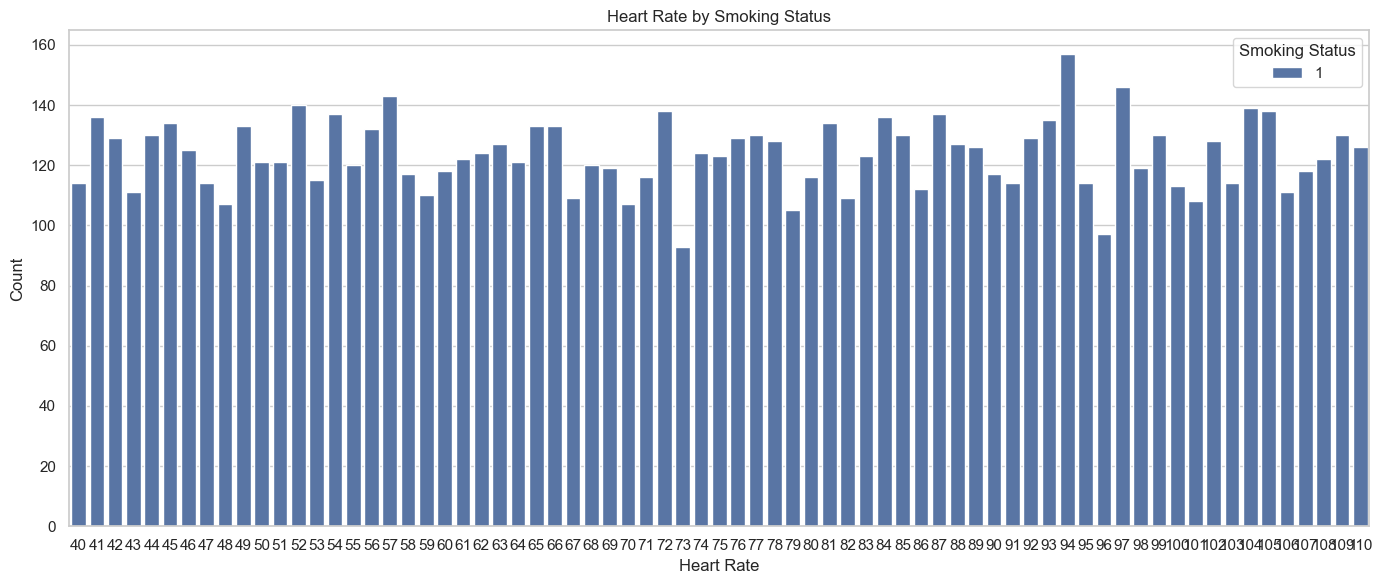

Heart Rate  40   41   42   43   44   45   46   47   48   49   ...  101  102  \
Smoking                                                       ...             
1           114  136  129  111  130  134  125  114  107  133  ...  108  128   

Heart Rate  103  104  105  106  107  108  109  110  
Smoking                                             
1           114  139  138  111  118  122  130  126  

[1 rows x 71 columns]
Smoking
1    75.021682
Name: Heart Rate, dtype: float64


In [250]:
#Hypothesis 1(Smoking)[Shelly Tomar]

# EDA1(Using countplot graph)
import matplotlib.pyplot as plt
import seaborn as sns
smok_data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#Check Data Types and Null Values
print(smok_data.info())

# Heart Attacks rate by Smoking Status
plt.figure(figsize=(14, 6))
sns.countplot(x='Heart Rate', hue='Smoking', data=data)
plt.title('Heart Rate by Smoking Status')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.legend(title='Smoking Status')

# Show the plot
plt.tight_layout() 
plt.show()

# Create a contingency table to analyse the hheart attach rate by smoking status 
contingency_table = pd.crosstab(data['Smoking'], data['Heart Rate'])  # Adjust as necessary
print(contingency_table) 


# Calculate mean heart rate by smoking status
#This shows the mean heart rates for each smoking status group
mean_heart_rate = data.groupby('Smoking')['Heart Rate'].mean() 
print(mean_heart_rate)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient ID                          8763 non-null   object 
 1   Age                                 8763 non-null   int64  
 2   Gender                              8763 non-null   object 
 3   Cholesterol                         8763 non-null   int64  
 4   Blood Pressure                      8763 non-null   object 
 5   Heart Rate                          8763 non-null   int64  
 6   Diabetes                            8763 non-null   object 
 7   Family History of Heart Disease     8763 non-null   object 
 8   Smoking                             8763 non-null   int64  
 9   BMI                                 8763 non-null   float64
 10  Days of Physical Activity per Week  8763 non-null   int64  
 11  Sedentary Time per Day (hours)      8763 no

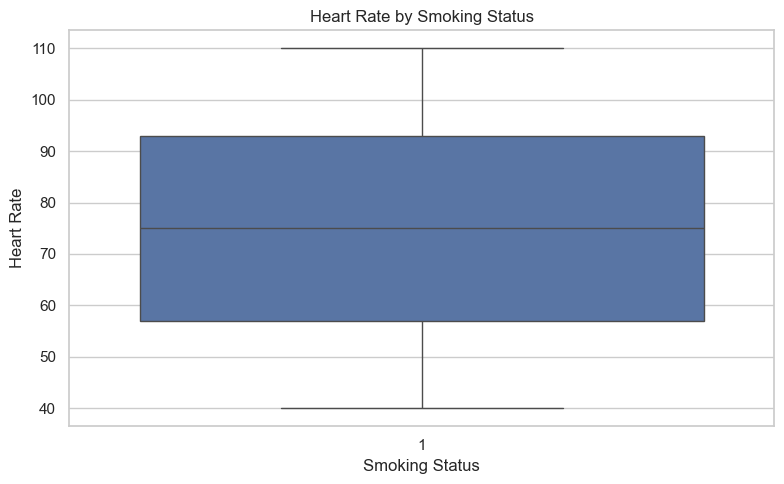

Heart Rate  40   41   42   43   44   45   46   47   48   49   ...  101  102  \
Smoking                                                       ...             
1           114  136  129  111  130  134  125  114  107  133  ...  108  128   

Heart Rate  103  104  105  106  107  108  109  110  
Smoking                                             
1           114  139  138  111  118  122  130  126  

[1 rows x 71 columns]


In [251]:
#Hypothesis 1(Smoking)[Shelly Tomar]

# EDA1(Using boxplot graph)
import matplotlib.pyplot as plt
import seaborn as sns
smok_data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#Check Data Types and Null Values
print(smok_data.info())

# Bivariate Analysis
# Heart Rate by Smoking Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Smoking', y='Heart Rate', data=data)  # Replace with actual column names
plt.title('Heart Rate by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Heart Rate')

# Show the plot
plt.tight_layout() 
plt.show()

# Create a contingency table to analyse the hheart attach rate by smoking status 
contingency_table = pd.crosstab(data['Smoking'], data['Heart Rate'])  # Adjust as necessary
print(contingency_table)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient ID                          8763 non-null   object 
 1   Age                                 8763 non-null   int64  
 2   Gender                              8763 non-null   object 
 3   Cholesterol                         8763 non-null   int64  
 4   Blood Pressure                      8763 non-null   object 
 5   Heart Rate                          8763 non-null   int64  
 6   Diabetes                            8763 non-null   object 
 7   Family History of Heart Disease     8763 non-null   object 
 8   Smoking                             8763 non-null   int64  
 9   BMI                                 8763 non-null   float64
 10  Days of Physical Activity per Week  8763 non-null   int64  
 11  Sedentary Time per Day (hours)      8763 no

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19908\1509296522.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


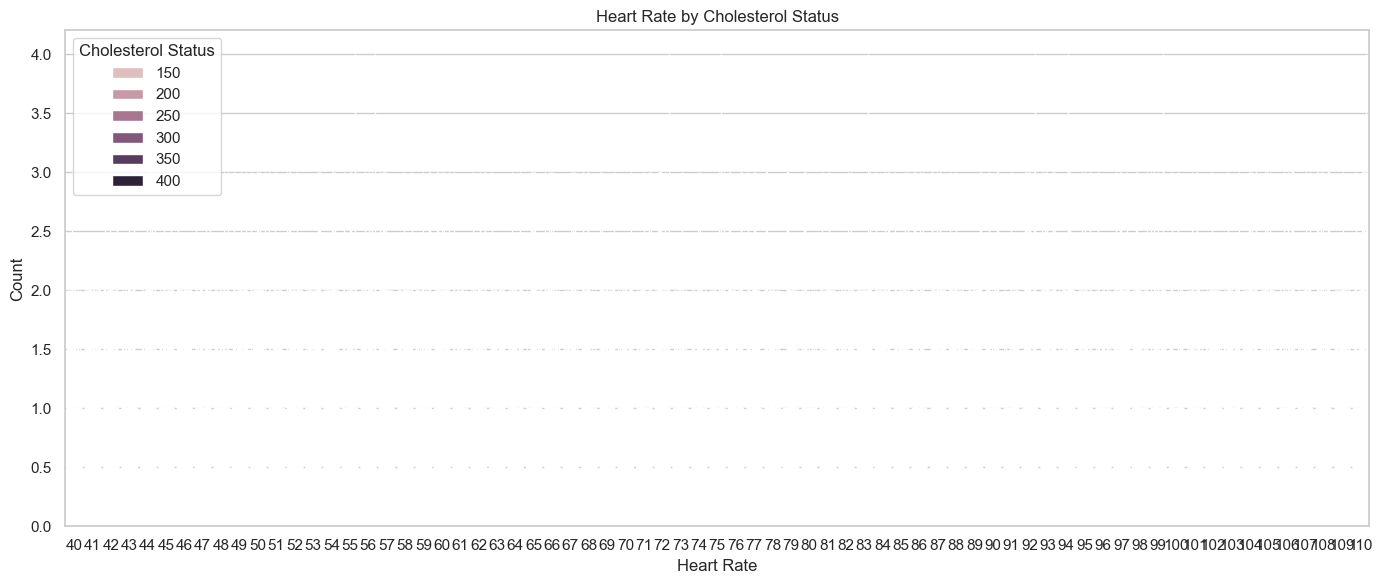

Heart Rate   40   41   42   43   44   45   46   47   48   49   ...  101  102  \
Cholesterol                                                    ...             
120            0    0    1    1    0    1    1    0    0    1  ...    1    2   
121            1    2    2    0    0    0    2    1    0    1  ...    1    0   
122            0    0    1    0    0    1    0    1    0    0  ...    1    1   
123            0    2    0    2    0    0    1    0    1    1  ...    1    0   
124            1    2    1    1    0    1    0    0    1    1  ...    0    1   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
396            0    0    0    0    1    2    1    0    1    0  ...    1    1   
397            0    0    0    0    0    0    0    0    1    1  ...    0    0   
398            0    0    0    1    0    0    0    0    1    0  ...    0    0   
399            1    0    1    0    0    0    0    0    1    2  ...    0    2   
400            0    1    0    0    3    

In [252]:
#Hypothesis 2(Cholesterol)[Shelly Tomar]

# EDA1(Using countplot graph)
import matplotlib.pyplot as plt
import seaborn as sns
smok_data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#Check Data Types and Null Values
print(smok_data.info())

# Heart Attacks rate by Cholesterol Status
plt.figure(figsize=(14, 6))
sns.countplot(x='Heart Rate', hue='Cholesterol', data=data)
plt.title('Heart Rate by Cholesterol Status')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.legend(title='Cholesterol Status')

# Show the plot
plt.tight_layout() 
plt.show()

# Create a contingency table to analyse the hheart attach rate by Cholesterol status 
contingency_table = pd.crosstab(data['Cholesterol'], data['Heart Rate'])  # Adjust as necessary
print(contingency_table)


# Calculate mean heart rate by Cholesterol status
#This shows the mean heart rates for each Cholesterol status group
mean_heart_rate = data.groupby('Cholesterol')['Heart Rate'].mean() 
print(mean_heart_rate)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Patient ID                          8763 non-null   object 
 1   Age                                 8763 non-null   int64  
 2   Gender                              8763 non-null   object 
 3   Cholesterol                         8763 non-null   int64  
 4   Blood Pressure                      8763 non-null   object 
 5   Heart Rate                          8763 non-null   int64  
 6   Diabetes                            8763 non-null   object 
 7   Family History of Heart Disease     8763 non-null   object 
 8   Smoking                             8763 non-null   int64  
 9   BMI                                 8763 non-null   float64
 10  Days of Physical Activity per Week  8763 non-null   int64  
 11  Sedentary Time per Day (hours)      8763 no

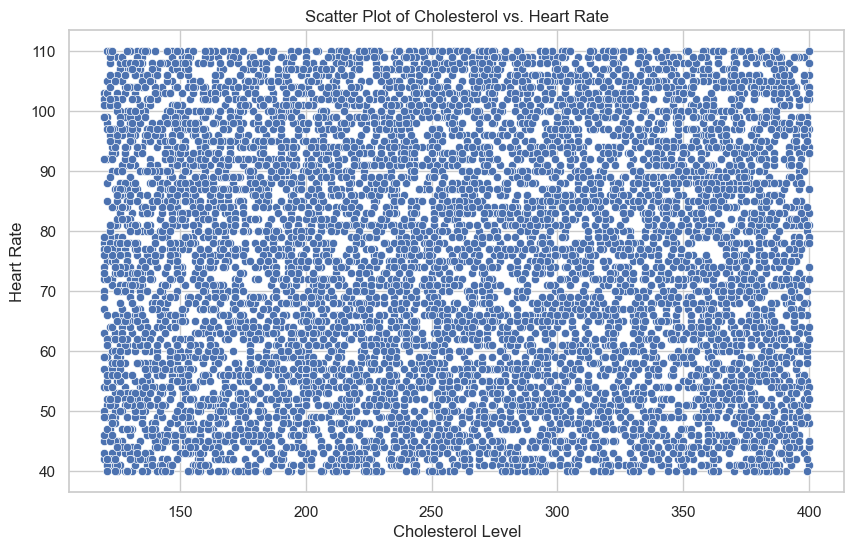

<Figure size 640x480 with 0 Axes>

Heart Rate   40   41   42   43   44   45   46   47   48   49   ...  101  102  \
Cholesterol                                                    ...             
120            0    0    1    1    0    1    1    0    0    1  ...    1    2   
121            1    2    2    0    0    0    2    1    0    1  ...    1    0   
122            0    0    1    0    0    1    0    1    0    0  ...    1    1   
123            0    2    0    2    0    0    1    0    1    1  ...    1    0   
124            1    2    1    1    0    1    0    0    1    1  ...    0    1   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
396            0    0    0    0    1    2    1    0    1    0  ...    1    1   
397            0    0    0    0    0    0    0    0    1    1  ...    0    0   
398            0    0    0    1    0    0    0    0    1    0  ...    0    0   
399            1    0    1    0    0    0    0    0    1    2  ...    0    2   
400            0    1    0    0    3    

In [253]:
#Hypothesis 2(Cholesterol)[Shelly Tomar]

# EDA1(Using box graph)
import matplotlib.pyplot as plt
import seaborn as sns
smok_data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#step 1:Check Data Types and Null Values
print(smok_data.info())

# Step 2: Create Scatter Plot for Cholesterol vs. Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cholesterol', y='Heart Rate', data=data)  # Replace with actual column names
plt.title('Scatter Plot of Cholesterol vs. Heart Rate')
plt.xlabel('Cholesterol Level')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

# Step 3: Show the plot
plt.tight_layout() 
plt.show()

# Step 4: Create a contingency table to analyse the hheart attach rate by Cholesterol status 
contingency_table = pd.crosstab(data['Cholesterol'], data['Heart Rate'])  # Adjust as necessary
print(contingency_table)


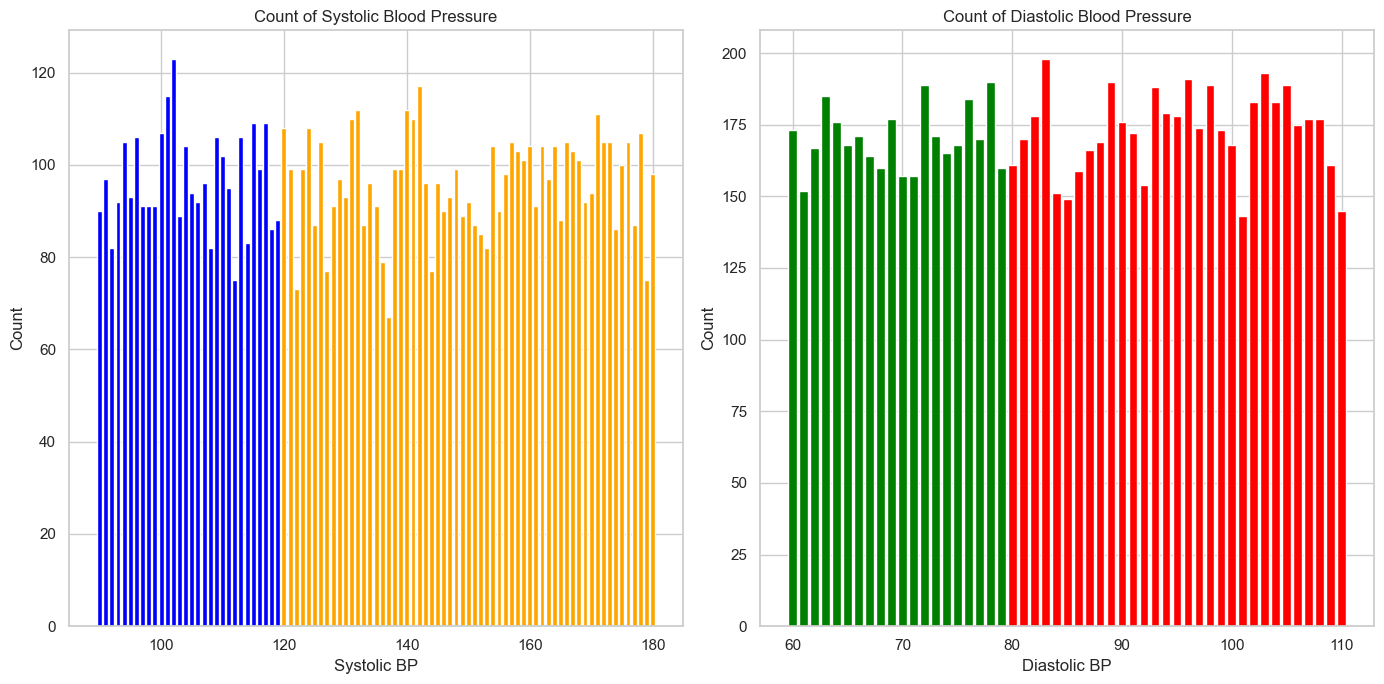

In [254]:
# Hypothesis 3(Blood Pressure)[Aditya_rawat]
# EDA1(Using bar graph)
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

#So we need to get(systolic and diastolic bp) so we go to data cleaning step and create step 10
# Count occurrences for Systolic BP and Diastolic BP
systolic_counts = data['Systolic BP'].value_counts()
diastolic_counts = data['Diastolic BP'].value_counts()

# Set up the figure size
plt.figure(figsize=(14, 7))

# Create a subplot for Systolic BP
plt.subplot(1, 2, 1)
colors = ['blue' if bp < 120 else 'orange' for bp in systolic_counts.index]
plt.bar(systolic_counts.index, systolic_counts.values, color=colors)
plt.xlabel('Systolic BP')
plt.ylabel('Count')
plt.title('Count of Systolic Blood Pressure')

# Create a subplot for Diastolic BP
plt.subplot(1, 2, 2)
colors = ['green' if bp < 80 else 'red' for bp in diastolic_counts.index]
plt.bar(diastolic_counts.index, diastolic_counts.values, color=colors)
plt.xlabel('Diastolic BP')
plt.ylabel('Count')
plt.title('Count of Diastolic Blood Pressure')

# Show the plot
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

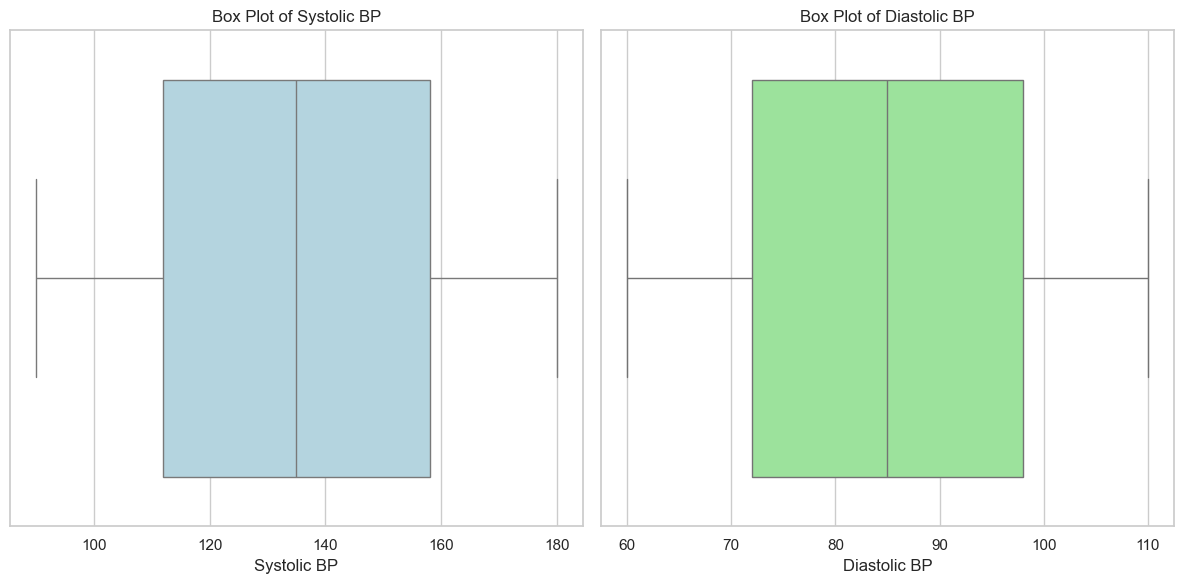

In [255]:
# Hypothesis 3(Blood Pressure)[Aditya_rawat]
# EDA2(Using box plot-for identifying if any outliers are there)
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Convert relevant columns to numeric, coercing errors to NaN
data['Systolic BP'] = pd.to_numeric(data['Systolic BP'], errors='coerce')
data['Diastolic BP'] = pd.to_numeric(data['Diastolic BP'], errors='coerce')

# Drop rows with NaN values in relevant columns
data.dropna(subset=['Systolic BP', 'Diastolic BP'], inplace=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Box plot for Systolic BP
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Systolic BP'], color='lightblue')
plt.title('Box Plot of Systolic BP')
plt.xlabel('Systolic BP')

# Box plot for Diastolic BP
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Diastolic BP'], color='lightgreen')
plt.title('Box Plot of Diastolic BP')
plt.xlabel('Diastolic BP')

# Adjust layout for better fitting
plt.tight_layout()
plt.show()

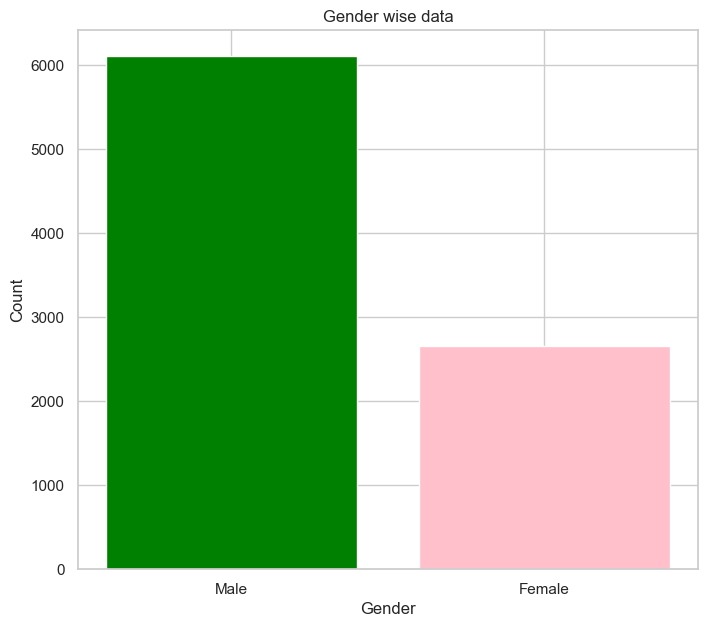

In [256]:
# Hypothesis 4(risk of disease by Gender)[Aditya_rawat]
#EDA3(bar plot for getting gender wise data)
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Create a DataFrame with the 'Gender' column
df_data = data[['Gender']]

# Count the occurrences of each gender
Hyp_num = df_data['Gender'].value_counts()

# Set up the figure size
plt.figure(figsize=(8, 7))

#color to differentiate gender
colors = ['green' if gender == 'Male' else 'pink' for gender in Hyp_num.index]
# Create a bar plot using the counts
plt.bar(Hyp_num.index, Hyp_num.values,color=colors)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender wise data')

# Show the plot
plt.show()

   Gender  Systolic BP  Diastolic BP
0  Female   135.317119     85.206259
1    Male   134.970872     85.134348


<Figure size 1200x600 with 0 Axes>

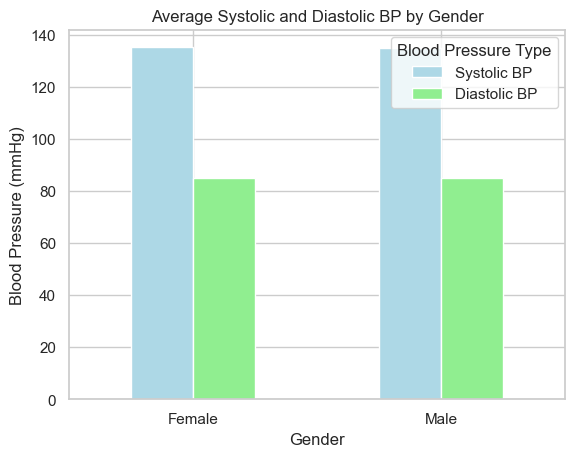

In [257]:
# Hypothesis 4(risk of disease by Gender)[Aditya_rawat]
#EDA4(grouped analyses between Hypothesis 3 & 4)
data = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Convert relevant columns to numeric, coercing errors to NaN
data['Systolic BP'] = pd.to_numeric(data['Systolic BP'], errors='coerce')
data['Diastolic BP'] = pd.to_numeric(data['Diastolic BP'], errors='coerce')

# Drop rows with NaN values in relevant columns
data.dropna(subset=['Systolic BP', 'Diastolic BP'], inplace=True)

# Group by Gender and calculate mean BP values
grouped_bp = data.groupby('Gender')[['Systolic BP', 'Diastolic BP']].mean().reset_index()

# Print the grouped data
print(grouped_bp)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Bar plot for average Systolic and Diastolic BP by Gender
grouped_bp.set_index('Gender').plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Average Systolic and Diastolic BP by Gender')
plt.ylabel('Blood Pressure (mmHg)')
plt.xticks(rotation=0)
plt.legend(title='Blood Pressure Type', labels=['Systolic BP', 'Diastolic BP'])
plt.show()

  Patient ID  Age  Gender  Cholesterol Blood Pressure  Heart Rate Diabetes  \
0    BMW7812   67    Male          208         158/88          72       No   
1    CZE1114   21    Male          389         165/93          98      Yes   
2    BNI9906   21  Female          324         174/99          72      Yes   
3    JLN3497   84    Male          383        163/100          73      Yes   
4    GFO8847   66    Male          318          91/88          93      Yes   

  Family History of Heart Disease  Smoking    BMI  ...  \
0                             Yes        1  31.25  ...   
1                             Yes        1  27.19  ...   
2                             Yes        1  28.18  ...   
3                             Yes        1  36.46  ...   
4                             Yes        1  21.81  ...   

   Sedentary Time per Day (hours)  Sleep Duration (hours)    Country  \
0                            6.62                       6  Argentina   
1                            4.96     

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19908\2961127952.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Days of Physical Activity per Week'] == i]['Risk Numeric'] for i in range(0, 8)],


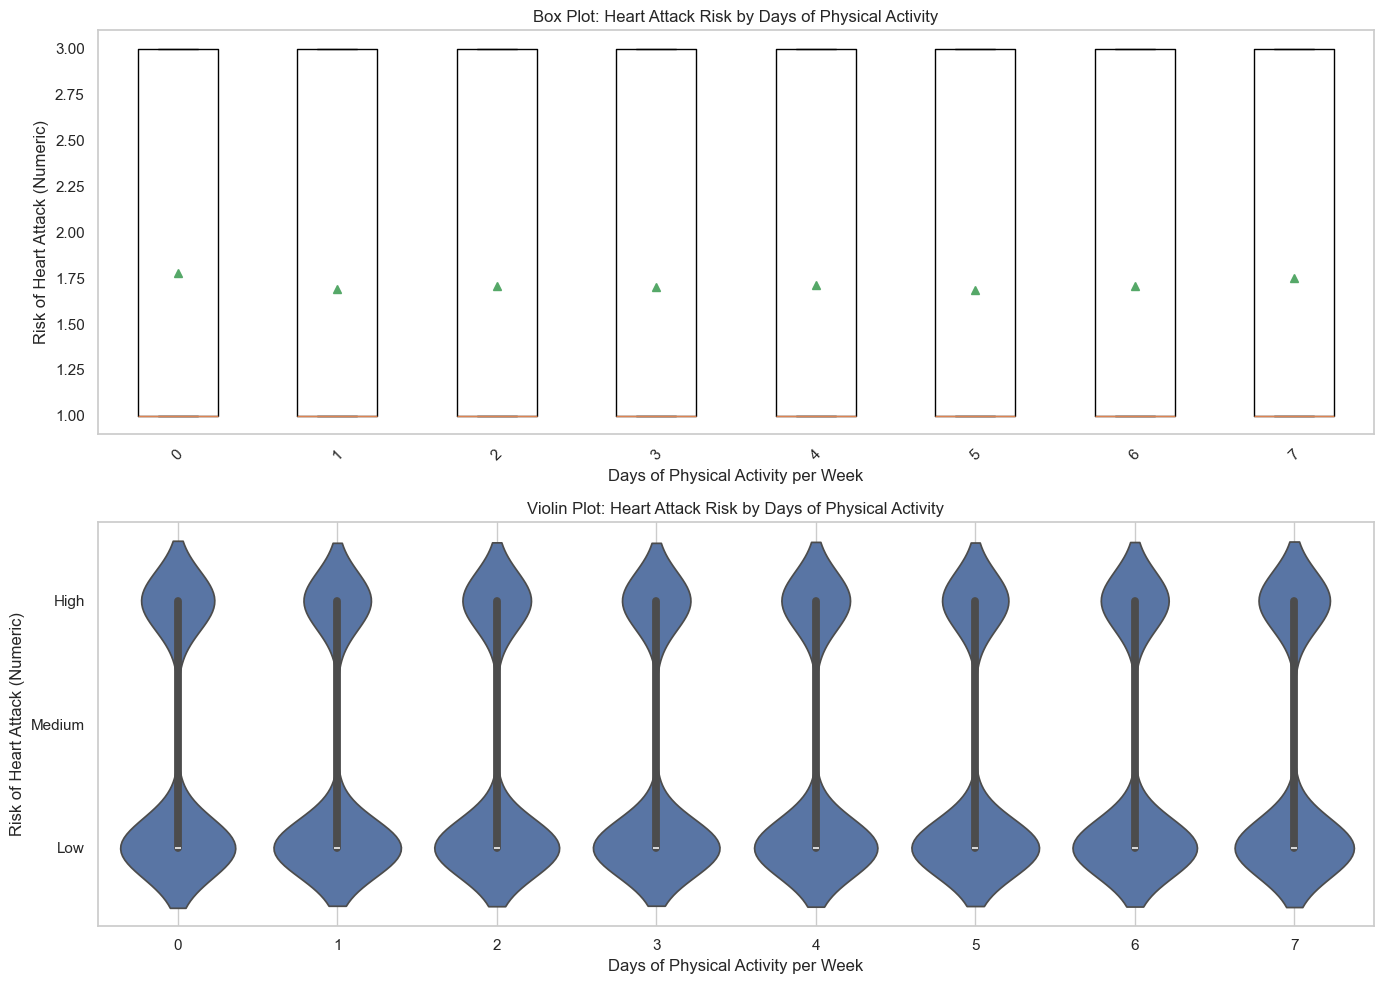

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#[prajjwal mishra]
# Load the dataset from the specified file path

df = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Check the first few rows of the dataframe to understand its structure
print(df.head())

# Map risk categories to numerical values for better plotting
risk_mapping = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

# Ensure the 'Risk of Heart Attack' column is categorical and mapped
df['Risk Numeric'] = df['Risk of Heart Attack'].map(risk_mapping)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(14, 10))

# Box Plot
plt.subplot(2, 1, 1)
plt.boxplot([df[df['Days of Physical Activity per Week'] == i]['Risk Numeric'] for i in range(0, 8)],
            labels=[str(i) for i in range(0, 8)], showmeans=True)
plt.title('Box Plot: Heart Attack Risk by Days of Physical Activity')
plt.xlabel('Days of Physical Activity per Week')
plt.ylabel('Risk of Heart Attack (Numeric)')
plt.xticks(rotation=45)
plt.grid()

# Violin Plot
plt.subplot(2, 1, 2)
sns.violinplot(x='Days of Physical Activity per Week', y='Risk Numeric', data=df)
plt.title('Violin Plot: Heart Attack Risk by Days of Physical Activity')
plt.xlabel('Days of Physical Activity per Week')
plt.ylabel('Risk of Heart Attack (Numeric)')
plt.yticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'])
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


  Patient ID  Age  Gender  Cholesterol Blood Pressure  Heart Rate Diabetes  \
0    BMW7812   67    Male          208         158/88          72       No   
1    CZE1114   21    Male          389         165/93          98      Yes   
2    BNI9906   21  Female          324         174/99          72      Yes   
3    JLN3497   84    Male          383        163/100          73      Yes   
4    GFO8847   66    Male          318          91/88          93      Yes   

  Family History of Heart Disease  Smoking    BMI  ...  \
0                             Yes        1  31.25  ...   
1                             Yes        1  27.19  ...   
2                             Yes        1  28.18  ...   
3                             Yes        1  36.46  ...   
4                             Yes        1  21.81  ...   

   Sedentary Time per Day (hours)  Sleep Duration (hours)    Country  \
0                            6.62                       6  Argentina   
1                            4.96     

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19908\3898615216.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Risk of Heart Attack')


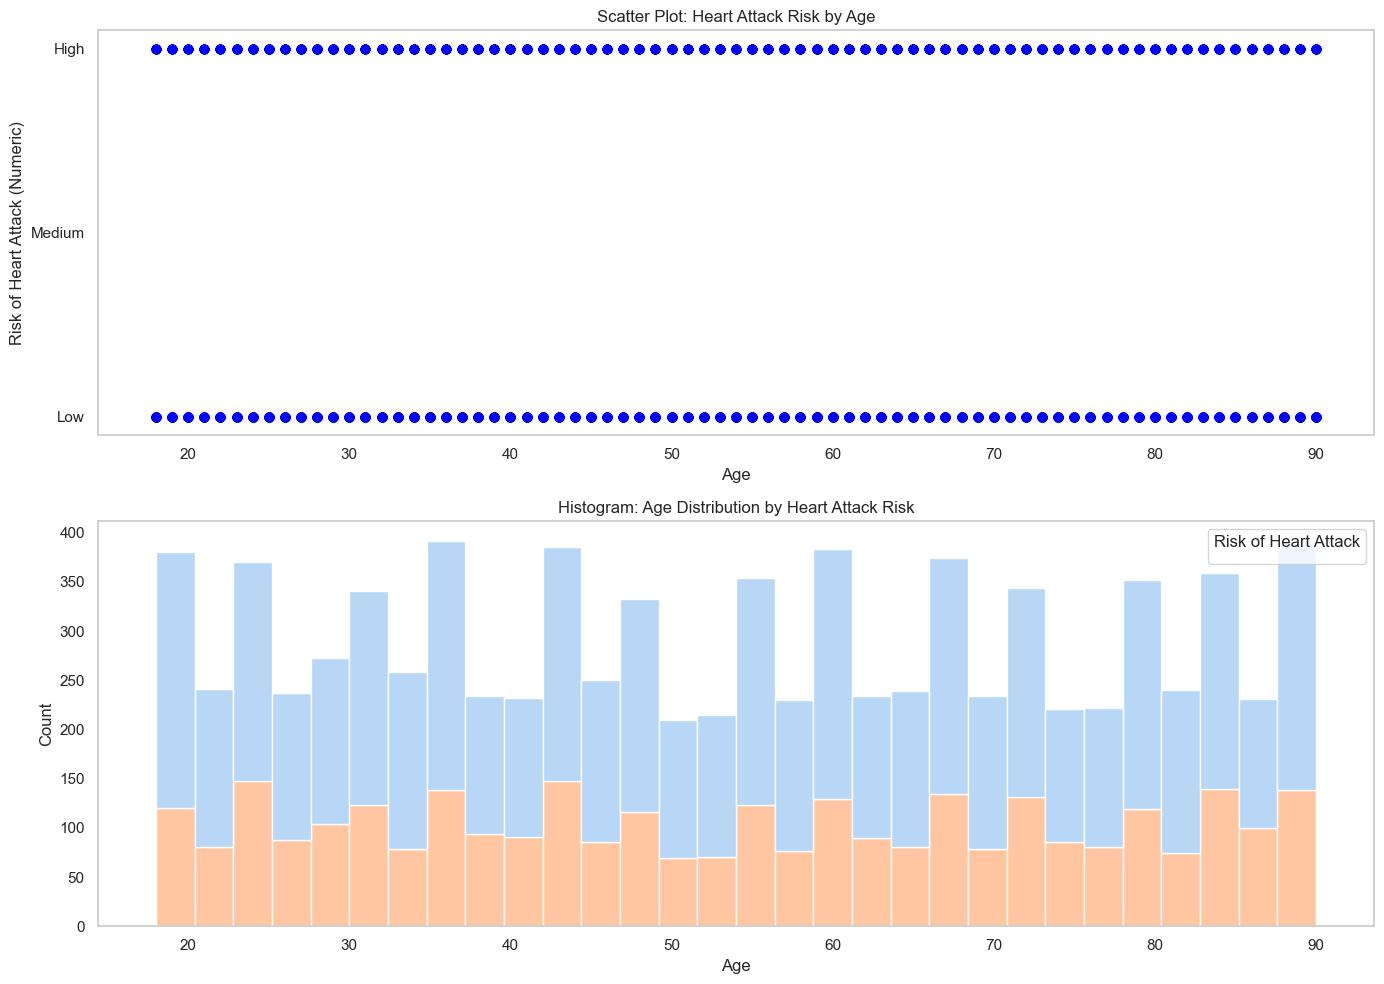

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#[prajjwal mishra]
# Load the dataset from the specified file path
df = pd.read_csv('C:/Users/lenovo/Desktop/Dic_Project/csvcleaned_heart_attack_prediction_dataset.csv')

# Check the first few rows of the dataframe to understand its structure
print(df.head())

# Map risk categories to numerical values for better plotting
risk_mapping = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

# Ensure the 'Risk of Heart Attack' column is categorical and mapped
df['Risk Numeric'] = df['Risk of Heart Attack'].map(risk_mapping)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure for the plots
plt.figure(figsize=(14, 10))

# Scatter Plot
plt.subplot(2, 1, 1)
plt.scatter(df['Age'], df['Risk Numeric'], alpha=0.6, color='blue')
plt.title('Scatter Plot: Heart Attack Risk by Age')
plt.xlabel('Age')
plt.ylabel('Risk of Heart Attack (Numeric)')
plt.yticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'])
plt.grid()

# Histogram
plt.subplot(2, 1, 2)
sns.histplot(data=df, x='Age', hue='Risk of Heart Attack', multiple="stack", bins=30, palette='pastel')
plt.title('Histogram: Age Distribution by Heart Attack Risk')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Risk of Heart Attack')
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
